In [2]:
#Libraries

# Data manipulation
import pandas as pd
import numpy as np
import os
# Data visualization
import matplotlib.pyplot as plt

import seaborn as sns
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For Missing Values
from sklearn.impute import SimpleImputer

# Processsing


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder



In [3]:
#Importing raw data

data_2015 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_15.csv")
data_2016 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_16.csv")
data_2017 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_17.csv")
data_2018 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2019 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2020 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_20.csv")

# 1-EDA

In [4]:
#quick look at data
data_2016.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,14881.000000,14881.000000,14881.000000,14881.000000,14881.000000,14881.000000,1.488100e+04,14881.000000,14881.000000,14881.000000,...,13263.000000,13263.000000,13263.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.00000,0.0
mean,194982.745985,24.930448,181.102547,75.428197,65.650427,70.288690,1.766313e+06,14734.359250,1.119145,2.942477,...,61.947448,50.995778,65.302873,66.355995,62.444376,61.019778,67.682324,43.754635,63.18665,NaN
std,36810.259594,4.603521,6.701927,6.933863,7.095894,6.293664,4.172073e+06,25239.472577,0.397214,0.658013,...,10.754742,17.676042,9.631893,7.691925,8.300535,8.286959,8.193498,8.375229,8.86955,NaN
min,2.000000,16.000000,155.000000,50.000000,44.000000,44.000000,0.000000e+00,0.000000,1.000000,1.000000,...,22.000000,15.000000,27.000000,36.000000,42.000000,29.000000,32.000000,12.000000,37.00000,NaN
25%,183644.000000,21.000000,176.000000,70.000000,61.000000,66.000000,2.500000e+05,1000.000000,1.000000,3.000000,...,56.000000,34.000000,59.000000,61.000000,56.250000,55.000000,62.000000,39.000000,57.00000,NaN
50%,204240.000000,24.000000,181.000000,75.000000,66.000000,70.000000,5.750000e+05,4000.000000,1.000000,3.000000,...,63.000000,56.000000,66.000000,66.000000,63.000000,60.000000,67.000000,44.000000,63.00000,NaN
75%,219905.000000,28.000000,186.000000,80.000000,70.000000,75.000000,1.400000e+06,20000.000000,1.000000,3.000000,...,69.000000,65.000000,72.000000,71.000000,68.000000,66.750000,73.000000,48.000000,69.00000,NaN
max,231022.000000,45.000000,204.000000,110.000000,94.000000,95.000000,1.110000e+08,550000.000000,5.000000,5.000000,...,95.000000,90.000000,89.000000,88.000000,87.000000,91.000000,90.000000,64.000000,90.00000,NaN


In [5]:
#Loading dataframes

data_2015 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_15.csv")
data_2016 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_16.csv")
data_2017 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_17.csv")
data_2018 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2019 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2020 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_20.csv")


print(data_2016.shape)

data_2015['year'] = 2015
data_2016['year'] = 2016
data_2017['year'] = 2017
data_2018['year'] = 2018
data_2019['year'] = 2019
data_2020['year'] = 2020

raw_data = pd.concat([data_2015,data_2016,data_2017,data_2018,data_2019,data_2020] , ignore_index= True)


def label_pos (raw_data):
    if(raw_data.team_position == "RB" or raw_data.team_position == "CB" or raw_data.team_position == "LB" or 
       raw_data.team_position == "LWB" or raw_data.team_position == "RCB"or raw_data.team_position == "RWB" or 
       raw_data.team_position == "LCB"):
        return 'Defender'
    if(raw_data.team_position == "RW" or raw_data.team_position == "CF" or raw_data.team_position == "LW" or 
       raw_data.team_position == "ST" or raw_data.team_position == "RS"or raw_data.team_position == "LS"
       or raw_data.team_position == "LF"or raw_data.team_position == "RF"):
        return 'Forward'
    if(raw_data.team_position == "RM" or raw_data.team_position == "CM" or raw_data.team_position == "LM"
       or raw_data.team_position == "CAM" or raw_data.team_position == "LDM" or raw_data.team_position == "RDM"
      or raw_data.team_position == "LAM"or raw_data.team_position == "RAM" or raw_data.team_position == "CDM"
       or raw_data.team_position == "RCM"or raw_data.team_position == "LCM"):
        return 'MidFielder'
    if (raw_data.team_position == "SUB"):
        return 'Substitute'
    if (raw_data.team_position == "RES"):
        return 'Reserve'
    if (raw_data.team_position == "GK"):
        return 'Goalkeeper'
    return "other"

raw_data['field_position'] = raw_data.apply (lambda raw_data: label_pos(raw_data), axis=1)




(14881, 104)


In [6]:
raw_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,year,field_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,2015,Forward
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,2015,Forward
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,2015,Substitute
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,2015,Forward
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Goalkeeper


In [6]:
#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="raw_data."
fullpath = os.path.join(mainpath, filename)
raw_data.to_csv(fullpath+"csv", index=False)

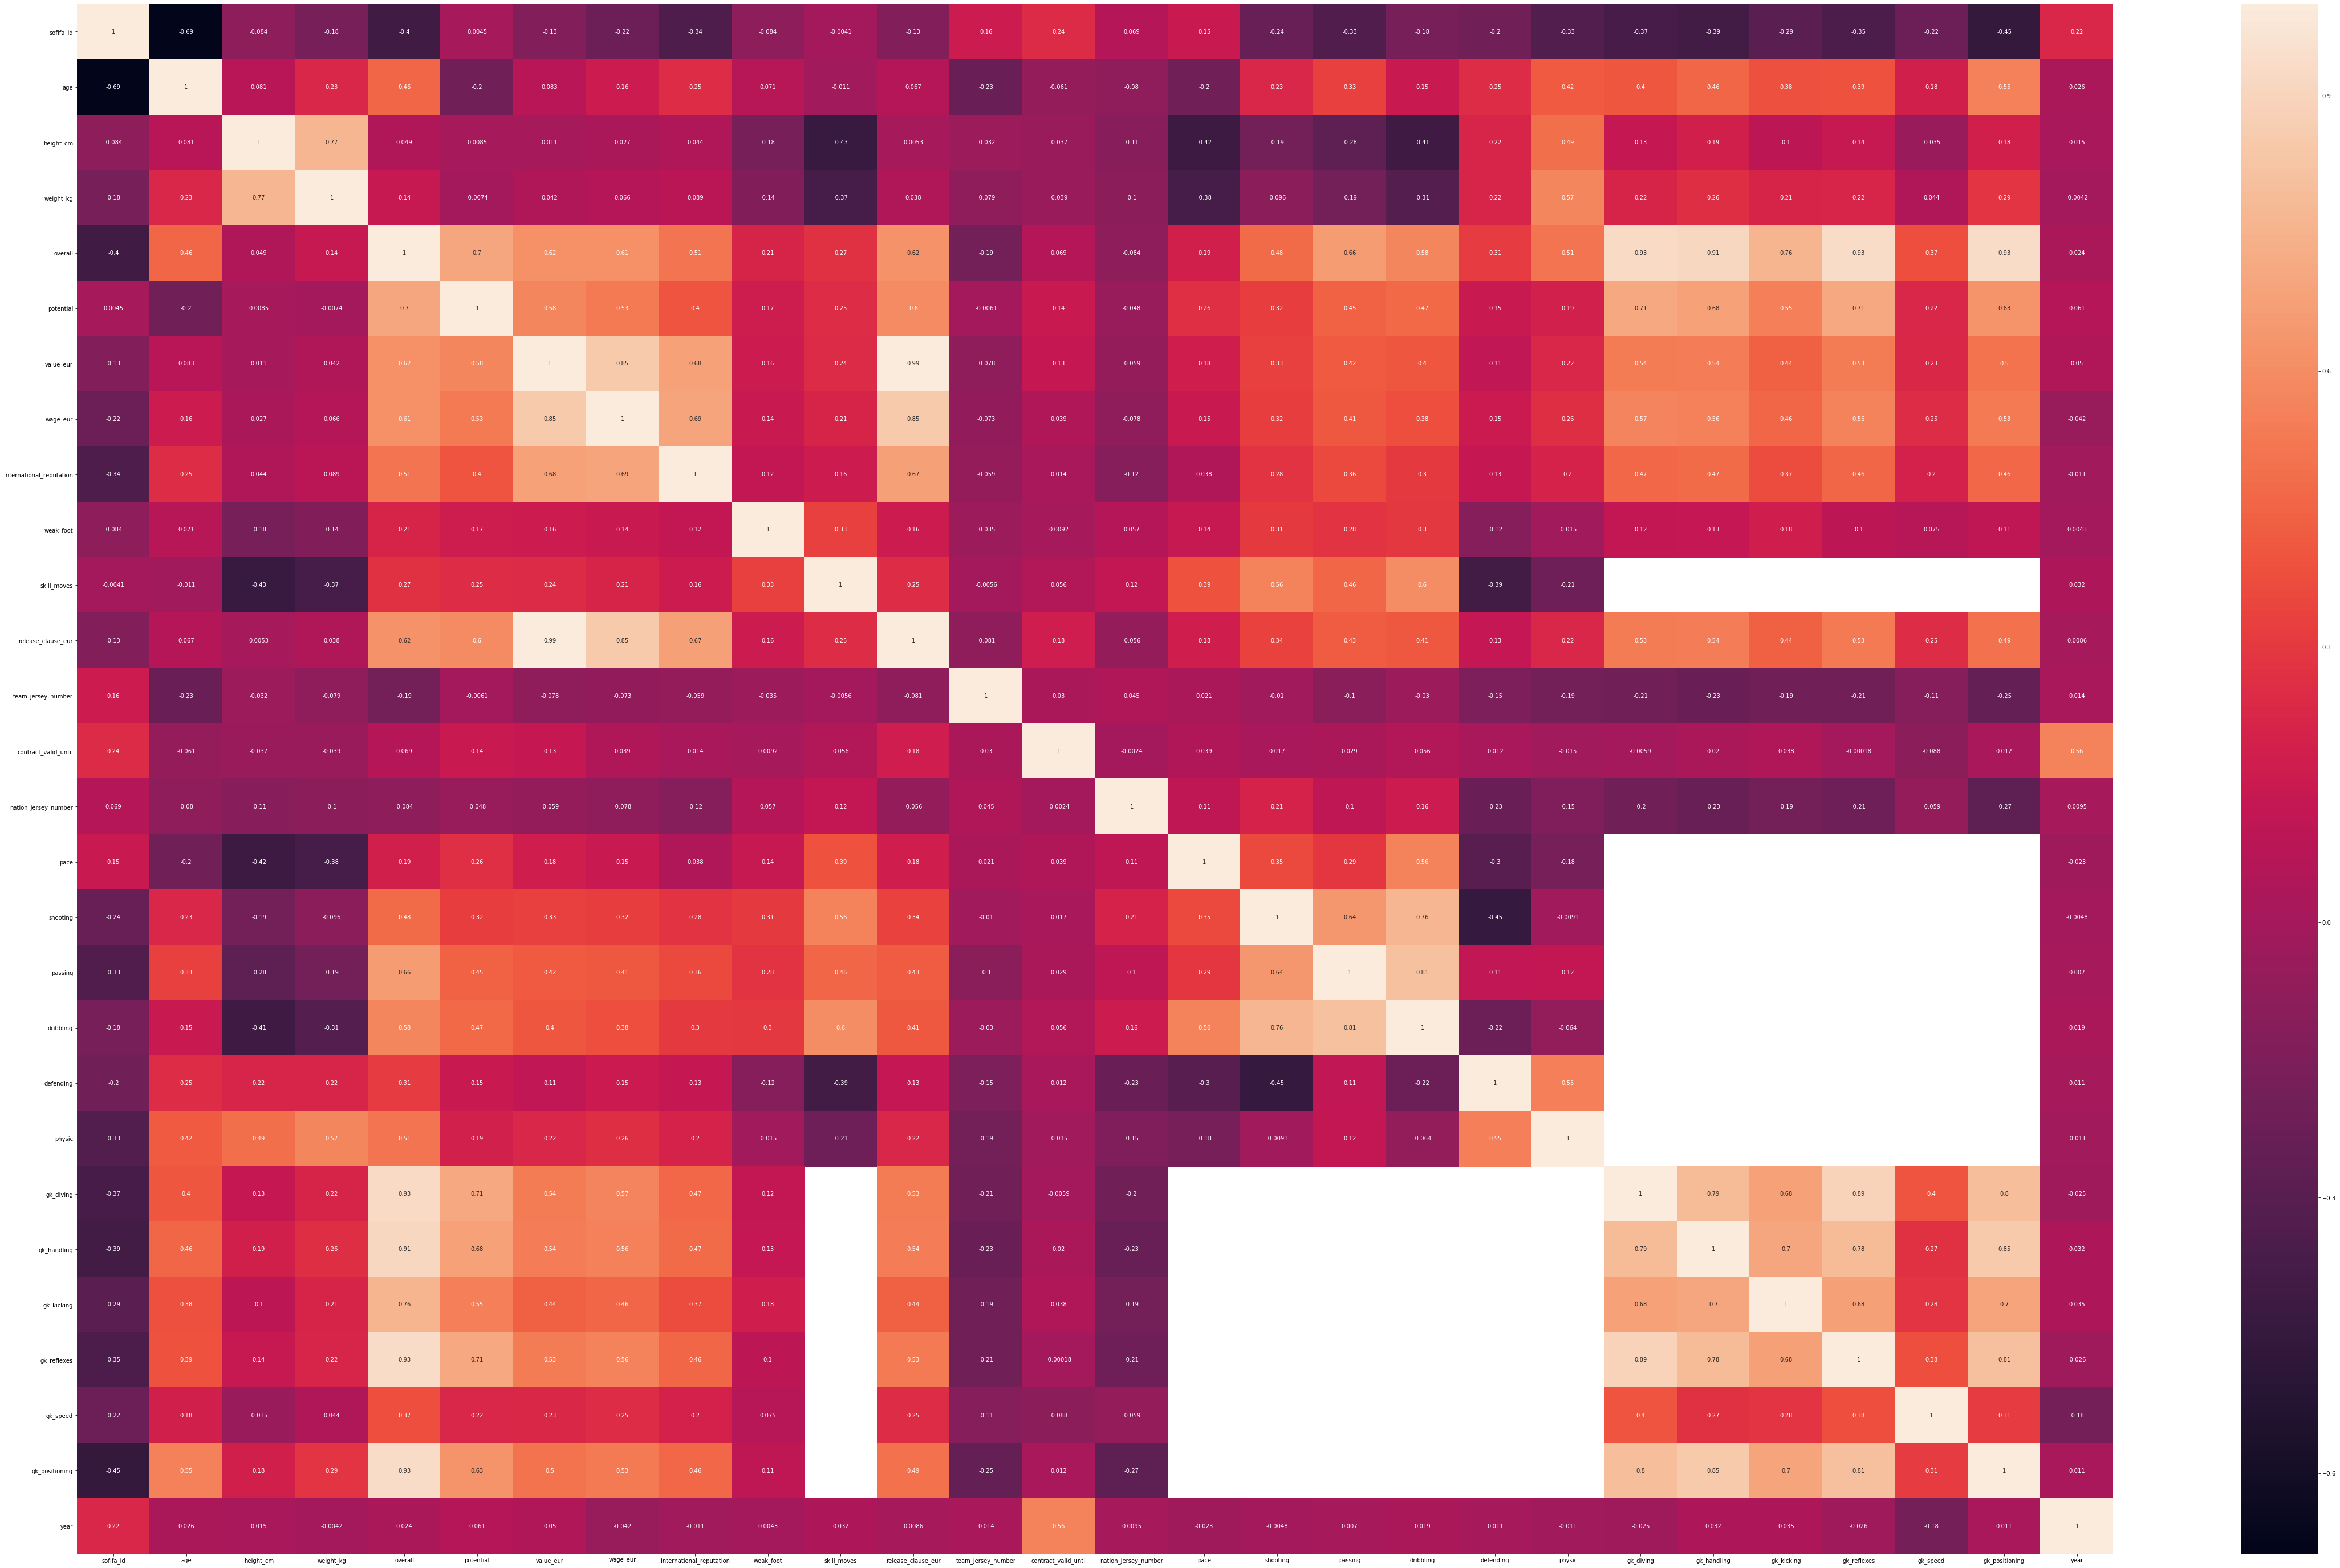

In [7]:
#looking for correlations on numeric variables

plt.figure(figsize=(80, 50))

sns_plot = sns.heatmap ( raw_data.corr(), annot = True )



In [8]:
#saving the plot for future visualisation

fig = sns_plot.get_figure()
fig.savefig("output.png")

# 2- Data Wrangling : cleaning data to apply the model

In [9]:
pd.options.display.max_columns = None
raw_data.select_dtypes(include =['object'] ).head()

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,Argentina,FC Barcelona,"RW, CF",Left,Medium/Low,Messi,Yes,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",RW,NaN,2004-07-01,RW,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,NaN,13-12,23+2,21+1,6,11,15,14,8,87+3,87+3,87+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,90+3,82+3,82+3,82+3,90+3,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,Portugal,Real Madrid,"LW, LM",Right,High/Low,C. Ronaldo,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LM,NaN,2009-07-01,ST,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,90+3,91+3,91+3,91+3,90+3,88+3,88+3,88+3,88+3,80+3,80+3,80+3,88+3,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
2,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,1984-01-23,Netherlands,FC Bayern München,"RM, LM, RW",Left,High/Low,Normal,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,NaN,2009-08-28,RW,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84+3,84+3,84+3,89+3,88+3,88+3,88+3,89+3,88+3,88+3,88+3,87+3,80+3,80+3,80+3,87+3,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3
3,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,1986-03-27,Germany,FC Bayern München,GK,Right,Medium/Medium,Normal,Yes,NaN,GK,NaN,2011-07-01,GK,"GK Long Throw, 1-on-1 Rush",15-10,13-12,25,48+6,11-14,16-9,14-11,11-14,47+6,31,58,61,43,88,35,25-17,78,44,83,16-9,29,30,12-13,70+20,37,NaN,10-15,10-15,11-14,85-3,87+2,91,90,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,1987-01-24,Uruguay,FC Barcelona,ST,Right,High/Medium,Normal,Yes,"#Acrobat, #Clinical Finisher",ST,NaN,2014-07-11,NaN,"Diver, Beat Offside Trap, Flair, Technical Dri...",77,90-1,77+2,82,87+2,88-2,86,84,64,91+2,88,78-1,86,91,60,88+4,69,86,76,85+3,78,41,91+3,84,85,NaN,30,45,38,27,25,31,33,37,87+3,87+3,87+3,87+3,88+3,88+3,88+3,87+3,86+3,86+3,86+3,85+3,79+3,79+3,79+3,85+3,67+3,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3


In [10]:
#raw_data.select_dtypes(include =['object'] ).columns.values.tolist()

In [7]:
 df_with_dummies = pd.get_dummies(raw_data, columns=[ 'nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate','field_position'])
df_with_dummies.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,overall,potential,...,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,field_position_Defender,field_position_Forward,field_position_Goalkeeper,field_position_MidFielder,field_position_Reserve,field_position_Substitute,field_position_other
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,93,95,...,0,1,0,0,1,0,0,0,0,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,92,92,...,0,0,0,0,1,0,0,0,0,0
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,90,90,...,0,0,0,0,0,0,0,0,1,0
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,90,90,...,0,1,0,0,1,0,0,0,0,0
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,90,90,...,0,0,1,0,0,1,0,0,0,0


In [8]:
#From our previous analysis , we know that there are some Nans. Our model may not work so we must modify it
#From our previous analysis , we know that there are some Nans. Our model may not work so we must modify it

#print(raw_data.info())
selection = df_with_dummies.select_dtypes(exclude =['object'] )
#print(selection.info())
print(selection.shape)


selection = selection.fillna( value = selection.mean())
print(selection.shape)
selection = selection.fillna( value = 0)
print(selection.shape)
selection = selection[selection.value_eur != 0]
print(selection.shape)


print(f'selection shape: {selection.shape}')
print(f'raw_data shape:{raw_data.shape}')

print(f'Dropped rows : {len(raw_data) - len(selection)}' )


(100817, 2735)
(100817, 2735)
(100817, 2735)
(84084, 2735)
selection shape: (84084, 2735)
raw_data shape:(100817, 106)
Dropped rows : 16733


In [9]:
selection.head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,field_position_Defender,field_position_Forward,field_position_Goalkeeper,field_position_MidFielder,field_position_Reserve,field_position_Substitute,field_position_other
15465,158023,28,170,72,94,95,111000000,550000,5,4,...,0,1,0,0,1,0,0,0,0,0
15466,20801,30,185,80,93,93,85500000,475000,5,4,...,0,0,0,0,0,0,1,0,0,0
15467,9014,31,180,80,90,90,56000000,250000,5,2,...,0,0,0,0,0,0,0,0,1,0
15468,167495,29,193,92,90,90,58000000,250000,5,4,...,0,0,1,0,0,1,0,0,0,0
15469,176580,28,182,85,90,90,69000000,300000,5,4,...,0,0,0,0,1,0,0,0,0,0


In [10]:
#Displaying all columns
pd.options.display.max_columns = None
selection.tail()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
100812     245006   22        186         79       48         56      40000   
100813     250995   22        177         66       48         56      40000   
100814     252332   19        186         75       48         56      40000   
100815     251110   18        185         74       48         54      40000   
100816     233449   26        182         78       48         51      40000   

        wage_eur  international_reputation  weak_foot  skill_moves  \
100812      2000                         1          3            2   
100813      2000                         1          2            2   
100814      1000                         1          2            2   
100815      1000                         1          2            2   
100816      2000                         1          3            2   

        release_clause_eur  team_jersey_number  contract_valid_until  \
100812        7.000000e+04                36.0                2019.0   
100813        7.200000e+04                31.0                2022.0   
100814        7.000000e+04                38.0                2019.0   
100815        7.000000e+04                33.0                2022.0   
100816        4.593733e+06                37.0                2019.0   

        nation_jersey_number  pace  shooting  passing  dribbling  defending  \
100812             12.059056  57.0      23.0     28.0       33.0       47.0   
100813             12.059056  58.0      24.0     33.0       35.0       48.0   
100814             12.059056  54.0      35.0     44.0       45.0       48.0   
100815             12.059056  59.0      35.0     47.0       47.0       45.0   
100816             12.059056  60.0      32.0     51.0       45.0       47.0   

        physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
100812    51.0  65.408096       62.525   61.182206    66.352758  40.65694   
100813    48.0  65.408096       62.525   61.182206    66.352758  40.65694   
100814    51.0  65.408096       62.525   61.182206    66.352758  40.65694   
100815    52.0  65.408096       62.525   61.182206    66.352758  40.65694   
100816    55.0  65.408096       62.525   61.182206    66.352758  40.65694   

        gk_positioning  year  nationality_Afghanistan  nationality_Albania  \
100812       62.869039  2020                        0                    0   
100813       62.869039  2020                        0                    0   
100814       62.869039  2020                        0                    0   
100815       62.869039  2020                        0                    0   
100816       62.869039  2020                        0                    0   

        nationality_Algeria  nationality_Angola  \
100812                    0                   0   
100813                    0                   0   
100814                    0                   0   
100815                    0                   0   
100816                    0                   0   

        nationality_Antigua & Barbuda  nationality_Argentina  \
100812                              0                      0   
100813                              0                      0   
100814                              0                      0   
100815                              0                      0   
100816                              0                      0   

        nationality_Armenia  nationality_Aruba  nationality_Australia  \
100812                    0                  0                      0   
100813                    0                  0                      0   
100814                    0                  0                      0   
100815                    0                  0                      0   
100816                    0                  0                      0   

        nationality_Austria  nationality_Azerbaijan  nationality_Bahrain  \
100812                    0                       0              

In [11]:
selection_train =  selection[selection.year != 2020]

In [12]:
print(selection_train.shape)

(66056, 2735)


In [13]:
print(selection_train['year'].max())

2019


In [14]:
selection_train.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
15465     158023   28        170         72       94         95  111000000   
15466      20801   30        185         80       93         93   85500000   
15467       9014   31        180         80       90         90   56000000   
15468     167495   29        193         92       90         90   58000000   
15469     176580   28        182         85       90         90   69000000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
15465    550000                         5          4            4   
15466    475000                         5          4            5   
15467    250000                         5          2            4   
15468    250000                         5          4            1   
15469    300000                         5          4            4   

       release_clause_eur  team_jersey_number  contract_valid_until  \
15465        4.593733e+06                10.0                2018.0   
15466        4.593733e+06                 7.0                2018.0   
15467        4.593733e+06                10.0                2017.0   
15468        4.593733e+06                 1.0                2019.0   
15469        4.593733e+06                 9.0                2019.0   

       nation_jersey_number       pace   shooting    passing  dribbling  \
15465             10.000000  92.000000  88.000000  86.000000  95.000000   
15466              7.000000  92.000000  93.000000  80.000000  91.000000   
15467             11.000000  92.000000  86.000000  82.000000  92.000000   
15468              1.000000  68.073423  52.253949  56.871585  61.917345   
15469             12.059056  83.000000  88.000000  79.000000  87.000000   

       defending     physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
15465  24.000000  62.000000  65.408096       62.525   61.182206    66.352758   
15466  33.000000  78.000000  65.408096       62.525   61.182206    66.352758   
15467  32.000000  64.000000  65.408096       62.525   61.182206    66.352758   
15468  50.807406  64.958628  85.000000       87.000   91.000000    86.000000   
15469  42.000000  79.000000  65.408096       62.525   61.182206    66.352758   

       gk_speed  gk_positioning  year  nationality_Afghanistan  \
15465  40.65694       62.869039  2016                        0   
15466  40.65694       62.869039  2016                        0   
15467  40.65694       62.869039  2016                        0   
15468  60.00000       90.000000  2016                        0   
15469  40.65694       62.869039  2016                        0   

       nationality_Albania  nationality_Algeria  nationality_Angola  \
15465                    0                    0                   0   
15466                    0                    0                   0   
15467                    0                    0                   0   
15468                    0                    0                   0   
15469                    0                    0                   0   

       nationality_Antigua & Barbuda  nationality_Argentina  \
15465                              0                      1   
15466                              0                      0   
15467                              0                      0   
15468                              0                      0   
15469                              0                      0   

       nationality_Armenia  nationality_Aruba  nationality_Australia  \
15465                    0                  0                      0   
15466                    0                  0                      0   
15467                    0                  0                      0   
15468                    0                  0                      0   
15469                    0                  0                      0   

       nationality_Austria  nationality_Azerbaijan  nationality_Bahrain  \
15465                    0                       0   

In [15]:
a = selection_train.columns.values.tolist()
print(len(a))

2735


In [16]:
#a

In [17]:
a.remove('value_eur')
print(len(a))

a.remove('release_clause_eur')
print(len(a))

2734
2733


In [18]:
X_train = selection_train[a]

y_train = selection_train['value_eur']

In [19]:
X_train.shape

(66056, 2733)

In [20]:
y_train.shape

(66056,)

In [21]:
selection_test =  selection[selection.year == 2020]

In [22]:
print(selection_test['year'].max())

2020


In [23]:
selection_test.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
82539     158023   32        170         72       94         94   95500000   
82540      20801   34        187         83       93         93   58500000   
82541     190871   27        175         68       92         92  105500000   
82542     200389   26        188         87       91         93   77500000   
82543     183277   28        175         74       91         91   90000000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
82539    565000                         5          4            4   
82540    405000                         5          4            5   
82541    290000                         5          5            5   
82542    125000                         3          3            1   
82543    470000                         4          4            4   

       release_clause_eur  team_jersey_number  contract_valid_until  \
82539         195800000.0                10.0                2021.0   
82540          96500000.0                 7.0                2022.0   
82541         195200000.0                10.0                2022.0   
82542         164700000.0                13.0                2023.0   
82543         184500000.0                 7.0                2024.0   

       nation_jersey_number       pace   shooting    passing  dribbling  \
82539             12.059056  87.000000  92.000000  92.000000  96.000000   
82540              7.000000  90.000000  93.000000  82.000000  89.000000   
82541             10.000000  91.000000  85.000000  87.000000  95.000000   
82542              1.000000  68.073423  52.253949  56.871585  61.917345   
82543             10.000000  91.000000  83.000000  86.000000  94.000000   

       defending     physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
82539  39.000000  66.000000  65.408096       62.525   61.182206    66.352758   
82540  35.000000  78.000000  65.408096       62.525   61.182206    66.352758   
82541  32.000000  58.000000  65.408096       62.525   61.182206    66.352758   
82542  50.807406  64.958628  87.000000       92.000   78.000000    89.000000   
82543  35.000000  66.000000  65.408096       62.525   61.182206    66.352758   

       gk_speed  gk_positioning  year  nationality_Afghanistan  \
82539  40.65694       62.869039  2020                        0   
82540  40.65694       62.869039  2020                        0   
82541  40.65694       62.869039  2020                        0   
82542  52.00000       90.000000  2020                        0   
82543  40.65694       62.869039  2020                        0   

       nationality_Albania  nationality_Algeria  nationality_Angola  \
82539                    0                    0                   0   
82540                    0                    0                   0   
82541                    0                    0                   0   
82542                    0                    0                   0   
82543                    0                    0                   0   

       nationality_Antigua & Barbuda  nationality_Argentina  \
82539                              0                      1   
82540                              0                      0   
82541                              0                      0   
82542                              0                      0   
82543                              0                      0   

       nationality_Armenia  nationality_Aruba  nationality_Australia  \
82539                    0                  0                      0   
82540                    0                  0                      0   
82541                    0                  0                      0   
82542                    0                  0                      0   
82543                    0                  0                      0   

       nationality_Austria  nationality_Azerbaijan  nationality_Bahrain  \
82539                    0                       0   

In [24]:
X_test = selection_test[a]

y_test = selection_test['value_eur']

In [25]:
X_test.shape

(18028, 2733)

In [26]:
y_test.shape

(18028,)

# 3-Splitting the dataset

### As we are using temporal data , I am splitting 2015-2019 data to train and 2020 data to test.

# 4-Random Forest 

In [27]:

forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(X_train, y_train)

forest_reg.feature_importances_

#creating a dataframe with coeficients
display(pd.DataFrame(forest_reg.feature_importances_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head(30))


prediction_randomforest = forest_reg.predict(X_test)

#prediction_randomforest = forest_reg.predict(X_test)

,Coeff
overall,0.841991
potential,0.098991
age,0.020735
shooting,0.007980
year,0.007748
wage_eur,0.006925
dribbling,0.002852
defending,0.002827
sofifa_id,0.000978
physic,0.000794


In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest_mse = mean_squared_error(y_test, prediction_randomforest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

672729.3117340977

In [29]:
score = r2_score(y_test, prediction_randomforest)  
print('r2:',format(score*100,'.2f'),'%')

r2: 98.57 %


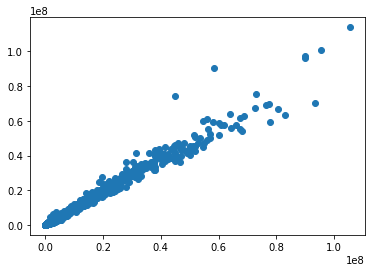

In [30]:
random_forest_scatter = plt.scatter (y_test , prediction_randomforest)


In [31]:
d = {'y_test' : y_test , 'predictions': prediction_randomforest}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_randomforest) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.head()


#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_randomforest."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:3.2027648528032775


In [32]:
df['predictions'].min()

13333.333333333334

In [33]:
df['predictions'].max()

113883333.33333333

# 5-Decision tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


prediction_decision_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, prediction_decision_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#creating a dataframe with coeficients
display(pd.DataFrame(tree_reg.feature_importances_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head(30))



score = r2_score(y_test, prediction_decision_tree)  
print('Accuracy:',format(score*100,'.2f'),'%')

,Coeff
overall,0.838631
potential,0.102936
age,0.021103
wage_eur,0.009224
year,0.007647
shooting,0.007631
defending,0.004320
dribbling,0.001612
sofifa_id,0.000763
passing,0.000689


Accuracy: 97.35 %


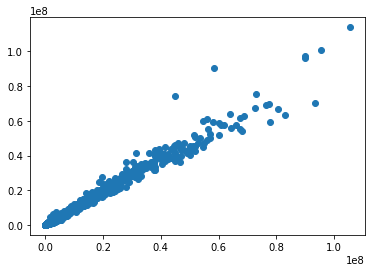

In [35]:
decision_tree_scatter = plt.scatter (y_test , prediction_randomforest)

In [36]:
d = {'y_test' : y_test , 'predictions': prediction_decision_tree}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_decision_tree) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.tail()

#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_decisiontree."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:3.13989367187456


In [37]:
df['predictions'].min()

10000.0

In [38]:
df['predictions'].max()

123000000.0

# 6-Linear regression 

In [39]:
linear_reg = LinearRegression() #model that we are going to use
linear_reg.fit(X_train , y_train)

LinearRegression()

In [40]:
linear_reg.fit(X_train , y_train)

LinearRegression()

In [41]:
#creating a dataframe with coeficients
pd.DataFrame(linear_reg.coef_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head()

,Coeff
"player_positions_CF, LW, ST",1.143293e+07
"player_positions_CF, RW, CAM, ST",9.112159e+06
"player_positions_LW, RW, CAM, LM",8.729822e+06
"player_positions_CM, CDM, ST",7.994680e+06
"player_positions_CAM, RM, CM, RW",7.411303e+06


In [42]:
#passing the model values that he has never seen (X_test)

prediction_linear_reg = linear_reg.predict(X_test)

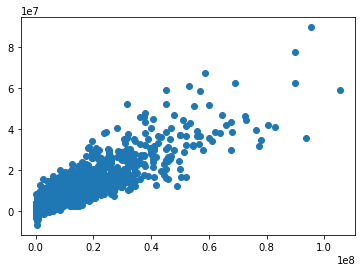

In [43]:
#Comparing our prediction to real values on a plot (visually)

plt.scatter (y_test , prediction_linear_reg)

In [44]:
d = {'y_test' : y_test , 'predictions': prediction_linear_reg}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_linear_reg) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.tail()

#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_linearreg."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:-75.12466272215268


In [45]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction_linear_reg)
metrics.mean_squared_error(y_test , prediction_linear_reg)
np.sqrt(metrics.mean_squared_error(y_test , prediction_linear_reg))
metrics.r2_score(y_test, prediction_linear_reg)

0.7803216105221032

In [46]:
score = r2_score(y_test, prediction_linear_reg)  
print('Accuracy:',format(score*100,'.2f'),'%')


#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_linearreg."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Accuracy: 78.03 %


# 7-Evaluating using Cross-Validation

In [47]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [643211.80661689  21190.23308194 826253.09237466  41623.01245314
 839874.68936227 588777.89746358  36885.95735205 353683.19346185
  24705.29111072   6176.73544264]
Mean: 338238.1908719734
Standard deviation: 336704.04650970193


In [49]:
lin_scores = cross_val_score(linear_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.09599878e+09 1.55064680e+12 5.53844540e+09 4.03152360e+11
 4.82636337e+08 1.57660497e+06 9.43151582e+05 3.53621848e+06
 1.38186735e+06 9.22901432e+05]
Mean: 196292459871.32654
Standard deviation: 467094263554.80164


In [50]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [ 939665.02355579   29176.23432019 1380524.88542563   54414.35370554
  796217.54258088  595467.56651155   39403.14546865    8566.43450634
       0.               0.        ]
Mean: 384343.5186074561
Standard deviation: 480166.85401117883


# 8-Fine-tune Model

## 8.1-Grid search

In [51]:
param_grid = [
    {'n_estimators': [3, 10, 40], 'max_features': [2, 3, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 6],
                          'n_estimators': [3, 10, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [52]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [53]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=10,
                      random_state=42)

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1976665.594470344 {'max_features': 2, 'n_estimators': 3}
1496318.2423264093 {'max_features': 2, 'n_estimators': 10}
1345278.1116576071 {'max_features': 2, 'n_estimators': 40}
1970886.6574025946 {'max_features': 3, 'n_estimators': 3}
1537077.8346484073 {'max_features': 3, 'n_estimators': 10}
1366342.490051795 {'max_features': 3, 'n_estimators': 40}
1837082.23434593 {'max_features': 6, 'n_estimators': 3}
1444632.5305890124 {'max_features': 6, 'n_estimators': 10}
1342718.5778955696 {'max_features': 6, 'n_estimators': 40}
1504782.3536964282 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1271940.7206803828 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1443724.267030868 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1145283.8658202614 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1487932.4306920713 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
1071009.805077304 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [55]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2354234.279140051

In [56]:
final_model_score = r2_score(y_test, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')


Accuracy: 82.43 %


In [61]:
'''  

import datetime
try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here
Current_Date = datetime.datetime.today() 
Current_Date= str(Current_Date)

a = X_train.columns.values.tolist()
root=Tk()

root.title("Fifa tool prediction")
entries = []
cont=0

#label3 = Label(root, text= display(X_train.describe())).grid(row = 7 , column = 100 )
for y in (a):
       
    my_label = Label(root, text = a[cont] )
    my_label.grid(row = cont ,column= 4 , pady=20 )
    my_label.config(font=("Arial", 10))
    cont = cont +1

for i in range(len(a)):
    en = Entry(root)
    en.grid(row=i, column=0)
    entries.append(en)
    i = i +1

def execute():
    lista= []
    for entry in entries:
        #print(entry.get())
        lista.append(entry.get())
    #print(lista)
    df = pd.DataFrame(columns=a )
    df.loc[0] = lista
    display(df)
    print(type(df))
    prediction_randomforest = forest_reg.predict(df)
    prediction_randomforest = int(prediction_randomforest)
    display(prediction_randomforest)
    print(type(prediction_randomforest))
    
    label = Label(root, text= f'Hola, su programa ha sido ejecutado con éxito en el dia {Current_Date}').grid(row = 5 , column = 1000 )
    #label.config(font=("Arial", 12))
    label2 = Label(root, text= f'El valor de este jugador es:  {prediction_randomforest} €').grid(row = 7 , column = 1000 )
    
    

button=Button(root,text="Execute model",command=execute).grid(row = 10 , column = 1000 )

root.mainloop()

print("--- %s seconds ---" % (time.time() - start_time))

'''

'  \n\nimport datetime\ntry:\n    # for Python2\n    from Tkinter import *   ## notice capitalized T in Tkinter\nexcept ImportError:\n    # for Python3\n    from tkinter import *   ## notice lowercase \'t\' in tkinter here\nCurrent_Date = datetime.datetime.today() \nCurrent_Date= str(Current_Date)\n\na = X_train.columns.values.tolist()\nroot=Tk()\n\nroot.title("Fifa tool prediction")\nentries = []\ncont=0\n\n#label3 = Label(root, text= display(X_train.describe())).grid(row = 7 , column = 100 )\nfor y in (a):\n       \n    my_label = Label(root, text = a[cont] )\n    my_label.grid(row = cont ,column= 4 , pady=20 )\n    my_label.config(font=("Arial", 10))\n    cont = cont +1\n\nfor i in range(len(a)):\n    en = Entry(root)\n    en.grid(row=i, column=0)\n    entries.append(en)\n    i = i +1\n\ndef execute():\n    lista= []\n    for entry in entries:\n        #print(entry.get())\n        lista.append(entry.get())\n    #print(lista)\n    df = pd.DataFrame(columns=a )\n    df.loc[0] = lista\